In [16]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from __future__ import absolute_import, division, print_function
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
import seaborn as sns
import numpy as np
import pandas as pd
import os, sys
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
sns.set_context("poster", font_scale=1.3)

import missingno as msno
import pandas_profiling

from sklearn.datasets import make_blobs
import time

In [17]:
pd.set_option('display.max_colum', 56)
data =pd.read_csv("../input/fifa-17-datasets/FullData.csv")
data2 =pd.read_csv("../input/agegroupedcsv/raw_countryGroupedByAgeGroup.csv")
data.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,7/1/2009,2021.0,94,185 cm,80 kg,Right,2/5/1985,32,LW/ST,High / Low,4,5,93,92,22,23,31,63,96,94,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,7/1/2004,2018.0,93,170 cm,72 kg,Left,6/24/1987,29,RW,Medium / Medium,4,4,95,97,13,26,28,48,95,93,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,7/1/2013,2021.0,92,174 cm,68 kg,Right,2/5/1992,25,LW,High / Medium,5,5,95,96,21,33,24,56,88,90,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,7/11/2014,2021.0,92,182 cm,85 kg,Right,1/24/1987,30,ST,High / Medium,4,4,91,86,30,38,45,78,93,92,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,7/1/2011,2021.0,92,193 cm,92 kg,Right,3/27/1986,31,GK,Medium / Medium,4,1,48,30,10,11,10,29,85,12,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11,91,89,95,90,89


## Setting the table

In [18]:
# From the fullData.csv get the age column***
aged=data['Age']
# count the ocurrance of each age group***
c=aged.value_counts()
type(c)
# convert to Dataframe***
c=pd.DataFrame(c)
# create a new column in the 'c' dataframe for the percentage of each age ***
c['Population %'] = c['Age'].apply(lambda x: (x/c['Age'].sum())*100)
c['Population %'] = c['Population %'].apply(lambda x: round(x, 1))

c=c.sort_index(ascending=True)
c=c.reset_index()
c.rename(columns={'index':'Age','Age':'Population'}, inplace=True)
c

,Age,Population,Population %
0,17,157,0.9
1,18,533,3.0
2,19,1004,5.7
3,20,1208,6.9
4,21,1196,6.8
5,22,1283,7.3
6,23,1356,7.7
7,24,1296,7.4
8,25,1447,8.2
9,26,1195,6.8


In [19]:
# line plot sample
# plt.plot(c['index'],c['Age %'], 'r^')
# plt.axis([16, 50, -1, 10])
# plt.show()

## Plotting the graph of 'population %' against 'Age'

(0, 10)

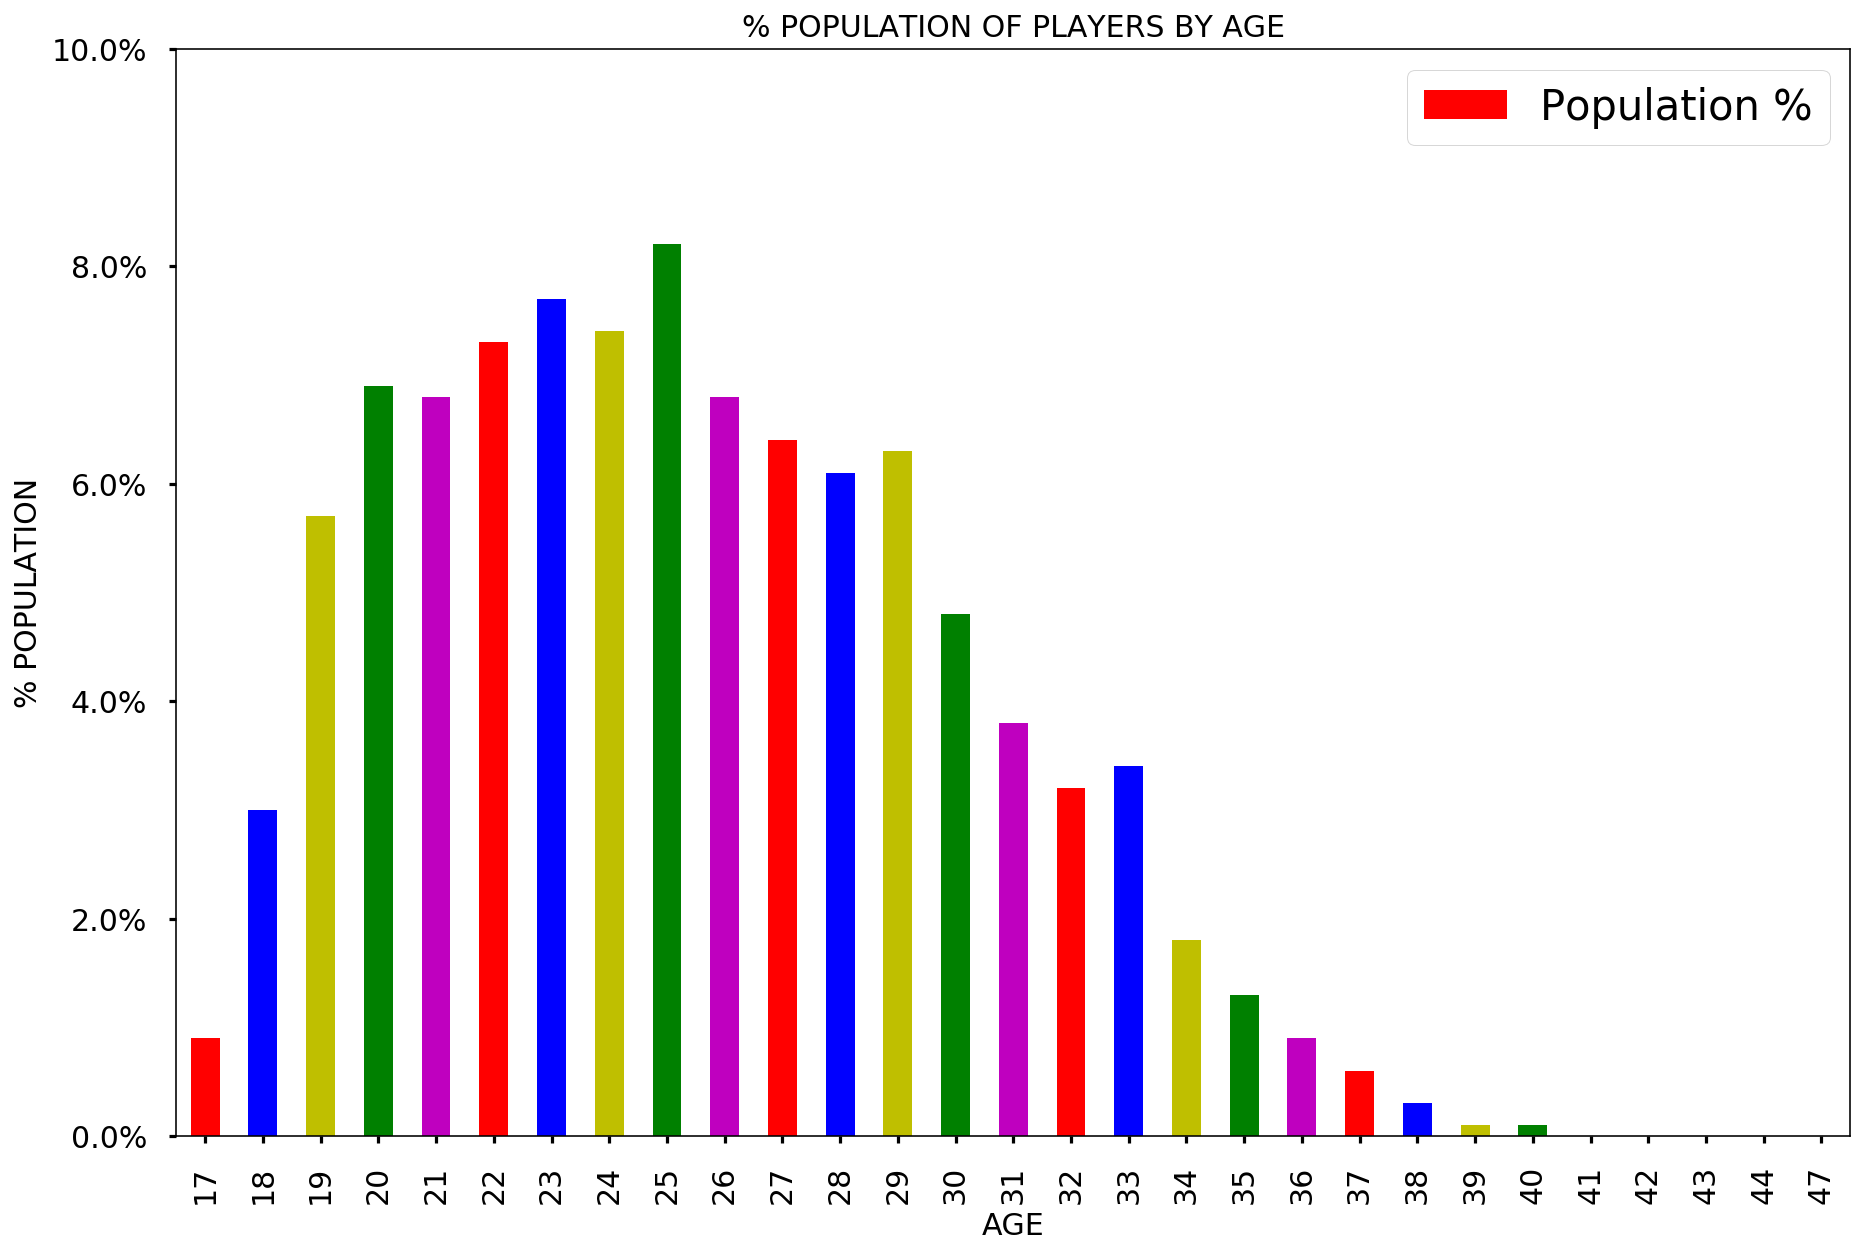

In [20]:

x_labels =c['Age']
# plt.xticks(np.arange(4),('Afghanistan', 'Albania', 'Algeria', 'Angola'))
ax = c['Population %'].plot(kind='bar',  figsize=(15, 10), legend=True, color= 'rbygm', fontsize=18)
# ax.set_xlabel("Hour", fontsize=12)
# ax.set_ylabel("V", fontsize=12)
# plt.show()
labels = ['0.0','2.0','4.0','6.0','8.0','10.0']
labels2 = []
for y in labels:
    y = y + '%'
    labels2.append(y)
    



# ax=c[['index','Age %']].plot.bar(color=list('ymr'))
# plt.figure(figsize=(12, 8))
# ax.set_yticklabels(fontsize=15)

ax.set_title("% POPULATION OF PLAYERS BY AGE", fontsize=15)
ax.set_xlabel("AGE", fontsize=15)
ax.set_ylabel("% POPULATION", fontsize=15)
ax.set_xticklabels(x_labels, fontsize=15)
ax.set_yticklabels(labels2, fontsize=15)
ax.set_ylim([0, 10])

In [21]:
# x =data['Age']
# # Make an array of y values for each x value
# yy =pd.DataFrame({'ran': np.random.randint(17588)})
# y=yy['ran']
# # use pylab to plot x and y
# plt.plot(x, y)
# # show the plot on the screen
# plt.show()


### Overall best team by Ratings

In [22]:
d = pd.read_csv("../input/rawcountryclub/raw_club.csv")
ccc=d.groupby(d["Club"]).describe()
ccc

Age                                                 \
                     count       mean       std   min    25%   50%    75%   
Club                                                                        
1. FC Heidenheim      25.0  24.160000  4.099593  18.0  20.00  24.0  28.00   
1. FC Köln            26.0  25.000000  3.752333  18.0  23.00  25.0  27.00   
1. FC Nürnberg        28.0  25.250000  4.291464  20.0  22.75  24.5  28.00   
1. FSV Mainz 05       32.0  24.343750  3.268712  19.0  22.00  24.0  27.00   
1860 München          28.0  25.964286  4.622667  19.0  22.75  25.5  30.00   
1899 Hoffenheim       26.0  24.807692  3.909161  18.0  22.25  25.0  27.00   
A. Minas G.           20.0  30.200000  3.205259  25.0  29.00  31.0  33.00   
AC Ajaccio            26.0  24.846154  3.662702  19.0  23.00  24.0  27.00   
AC Horsens            25.0  25.960000  5.357860  18.0  22.00  25.0  30.00   
AD Alcorcón           28.0  25.071429  4.681948  17.0  22.00  24.5  27.25   
ADO Den Haag          30.0  24.400000  5.075975  17.0  20.00  24.0  28.00   
AFC Wimbledon         28.0  25.214286  5.349677  17.0  21.75  25.0  30.00   
AIK                   20.0  26.250000  5.495213  19.0  22.75  25.0  29.50   
AJ Auxerre            28.0  23.642857  4.747040  18.0  20.75  22.0  24.25   
AS Monaco             33.0  23.515152  5.184841  17.0  20.00  22.0  25.00   
AS Nancy              27.0  26.629630  5.548029  18.0  21.50  28.0  31.00   
AS Saint-Étienne      29.0  25.620690  4.012603  18.0  23.00  26.0  29.00   
AZ                    29.0  23.310345  4.027614  17.0  20.00  23.0  25.00   
Aalborg BK            26.0  23.576923  4.657665  18.0  20.00  22.0  26.00   
Aalesunds FK          23.0  23.130435  4.126459  17.0  20.00  22.0  26.00   
Aarhus GF             27.0  24.407407  5.220221  17.0  20.00  23.0  29.00   
Aberdeen              24.0  24.666667  5.053339  17.0  19.75  25.0  29.00   
Accrington            28.0  23.571429  4.349786  18.0  20.00  23.0  26.25   
Adanaspor             30.0  24.300000  3.914165  18.0  22.25  24.0  27.00   
Adelaide United       25.0  25.240000  5.486954  18.0  20.00  23.0  30.00   
Admira Wacker         27.0  23.259259  2.876865  18.0  22.00  23.0  24.00   
Ajax                  31.0  21.741935  4.575061  17.0  19.00  20.0  23.50   
Akhisarspor           27.0  28.407407  2.885764  21.0  26.50  29.0  30.00   
Al Ahli               28.0  26.750000  2.862594  22.0  25.00  27.0  28.25   
Al Batin              30.0  26.533333  4.328999  21.0  23.00  26.5  29.00   
Al Faisaly            30.0  26.466667  3.036937  22.0  24.25  26.0  28.75   
Al Fateh              30.0  26.833333  4.235184  19.0  23.00  26.5  29.00   
Al Hilal              29.0  26.310345  4.000924  20.0  24.00  25.0  29.00   
Al Ittihad            30.0  25.600000  3.756374  20.0  22.00  24.5  28.75   
Al Khaleej            30.0  25.600000  3.179677  20.0  23.25  26.0  27.75   
Al Nassr              29.0  26.586207  4.436192  19.0  25.00  26.0  29.00   
Al Qadisiyah          30.0  24.333333  2.248882  21.0  23.00  24.0  25.75   
Al Raed               30.0  25.466667  2.979624  21.0  23.00  25.0  28.00   
Al Shabab             30.0  24.933333  3.859009  20.0  22.00  24.0  27.00   
Al Taawoun            29.0  26.965517  4.419783  21.0  24.00  26.0  30.00   
Al Wehda              29.0  26.344828  3.725164  21.0  23.00  26.0  29.00   
Al-Ettifaq            27.0  24.666667  3.562627  19.0  22.00  24.0  28.00   
Al. Petrolera         28.0  24.500000  3.511885  19.0  22.00  25.0  26.25   
Albirex Niigata       30.0  26.100000  4.245484  18.0  23.00  25.0  28.00   
Amiens SC             26.0  26.269231  3.955327  19.0  23.25  26.0  29.75   
Amkar Perm            23.0  27.434783  3.202642  21.0  24.50  28.0  29.50   
América               28.0  25.142857  4.527400  18.0  21.00  25.5  29.00   
Angers SCO            33.0  26.060606  3.639535  19.0  24.00  27.0  28.00   
Antalyaspor           30.0  26.500000  4.732500  18.0  24.25  27.0  29.50   
Anzhi Makhachkala  

In [23]:
clubs=ccc.index
datas = []
for x in clubs:

    y=ccc.loc[x]['Rating']['mean']
    
    z = ccc.loc[x]['Rating']['max']
    a = ccc.loc[x]['Rating']['min']
    datas.append([x,a,z,y])

In [24]:
tt=pd.DataFrame(datas)
tt=tt.rename(columns={0:'Club',1:'minRating',2:'maxRating',3:'avgRating'})
tt['avgRating']=tt['avgRating'].apply(lambda x: round(x, 1))
ss=tt.sort_values('avgRating', ascending=False)



In [25]:
ss=ss.set_index('Club')
ss=ss.drop('Free agent')
topTenClubByRating=ss.head(10)
topTenClubByRating

,minRating,maxRating,avgRating
Club,,,
Juventus,62.0,89.0,79.8
FC Bayern,58.0,92.0,79.1
Real Madrid,63.0,94.0,78.8
FC Barcelona,63.0,93.0,78.1
Roma,62.0,86.0,77.8
Napoli,54.0,85.0,77.8
Sevilla FC,60.0,83.0,77.0
PSG,61.0,89.0,76.7
Atlético Madrid,61.0,88.0,76.5


## Overall best Coutry by Rating

In [26]:
d = pd.read_csv("../input/rawcountryclub/raw_country.csv")
ccc=d.groupby(d["Nationality"]).describe()


In [27]:
ctry=ccc.index
datas = []
for x in ctry:

    y=ccc.loc[x]['Rating']['mean']
    
    z = ccc.loc[x]['Rating']['max']
    a = ccc.loc[x]['Rating']['min']
    datas.append([x,a,z,y])

In [28]:
tt=pd.DataFrame(datas)
tt=tt.rename(columns={0:'Country',1:'minRating',2:'maxRating',3:'avgRating'})
tt['avgRating']=tt['avgRating'].apply(lambda x: round(x, 1))
ss=tt.sort_values('avgRating', ascending=False)

In [29]:
ss=ss.set_index('Country')
# ss=ss.drop('Free agent')
topTenCountryByRating=ss.head(10)
topTenCountryByRating

,minRating,maxRating,avgRating
Country,,,
Chad,74.0,74.0,74.0
São Tomé & Príncipe,74.0,74.0,74.0
Dominican Republic,73.0,74.0,73.5
Cuba,67.0,79.0,73.0
Algeria,62.0,84.0,71.6
Togo,65.0,77.0,71.0
Eritrea,71.0,71.0,71.0
Oman,71.0,71.0,71.0
Czech Republic,52.0,88.0,71.0


## Top 200 Players

In [ ]:
pd.set_option('max_row', 200)
data = data[['Name','Nationality','Club','Age','Rating']]
data=data.sort_values('Rating',ascending=False)
top200 = data.head(200).reset_index()
top200=top200.drop('index', axis=1)
top200